# **Study Case : HELP Intenational** <br/> 

<font size="5"> <b> Problem Descriptions </b></font>
 <br />
(---- ***The Following Descriptions Are Written In Indonesian*** ----)  <br />
HELP International telah berhasil mengumpulkan sekitar $ 10 juta. Saat ini, CEO LSM perlu memutuskan bagaimana menggunakan uang ini secara strategis dan efektif. Jadi, CEO harus mengambil keputusan untuk memilih negara yang paling membutuhkan bantuan. Oleh karena itu, tugas pada projek kali ini adalah mengkategorikan negara menggunakan beberapa faktor sosial ekonomi dan kesehatan yang menentukan perkembangan negara secara keseluruhan. Kemudian, tentukan negara mana saja yang paling perlu menjadi fokus CEO.

<font size="5"> <b> Data Dictionary </b></font>
 <br />
(---- ***The Following Specifications Are Written In Indonesian*** ----) 
- Negara : Nama negara
- Kematian_anak: Kematian anak di bawah usia 5 tahun per 1000 kelahiran
- Ekspor : Ekspor barang dan jasa perkapita
- Kesehatan: Total pengeluaran kesehatan perkapita
- Impor: Impor barang dan jasa perkapita
- Pendapatan: Penghasilan bersih perorang
- Inflasi: Pengukuran tingkat pertumbuhan tahunan dari Total GDP 
- Harapan_hidup: Jumlah tahun rata-rata seorang anak yang baru lahir akan hidup jika pola kematian saat ini tetap sama
- Jumlah_fertiliti: Jumlah anak yang akan lahir dari setiap wanita jika tingkat kesuburan usia saat ini tetap sama
- GDPperkapita: GDP per kapita. Dihitung sebagai Total GDP dibagi dengan total populasi.


<font size="5"> <b> Steps </b></font>

1. Reading and Understanding Data
 - Import necessary libraries
 - Read and inspect data
2. Exploratory Data Analysis
 - Data cleansing
 - Univariate Analysis
 - Bivariate Analysis
 - Multivariate Analysis
3. Outliers Treatment
4. Scaling Data
5. Creating KMeans Clustering and Visualizing Clusters Formed
6. Report Countries

# **1. Reading and Understanding Data** <br/> 

#### 1.1 Import necessary libraries

In [4]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
import numpy as np
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For rescaling the data
from sklearn.preprocessing import StandardScaler

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To check most accurate KMeans clustering
from sklearn.metrics import silhouette_score

---
---

#### 1.2 Read and inspect data

**Read the data**

In [7]:
# Check the top 5 rows of dataframe
df = pd.read_csv('../data/Data_Negara_HELP.csv')
df.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [8]:
# Check the bottom 5 rows of dataframe
df.tail()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460


---

**Check data information**

In [ ]:
# Check dataframe shape
df.shape

(167, 10)

In [ ]:
# Check number of non-null data from each column and their datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
# Check number of unique data in each columns 
df.nunique()

Negara              167
Kematian_anak       139
Ekspor              147
Kesehatan           147
Impor               151
Pendapatan          156
Inflasi             156
Harapan_hidup       127
Jumlah_fertiliti    138
GDPperkapita        157
dtype: int64

From series above, we know that each data of column 'negara' is unique. Thus, the dataframe does not have duplicate data.

---

**Check data statistic**

In [ ]:
df.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


We can visualize these statistics in a later step to find useful insights.

---
---

# **2. Exploratory Data Analysis** <br/> 

#### 2.2 Data cleansing

**Check and handle null values**

In [ ]:
# Check any null values from given dataset
df.isna().sum()

Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

From series above, we know that the dataframe does not have any null values. Therefore, we can continue to next step.

---
---

#### 2.3 Univariate Analysis

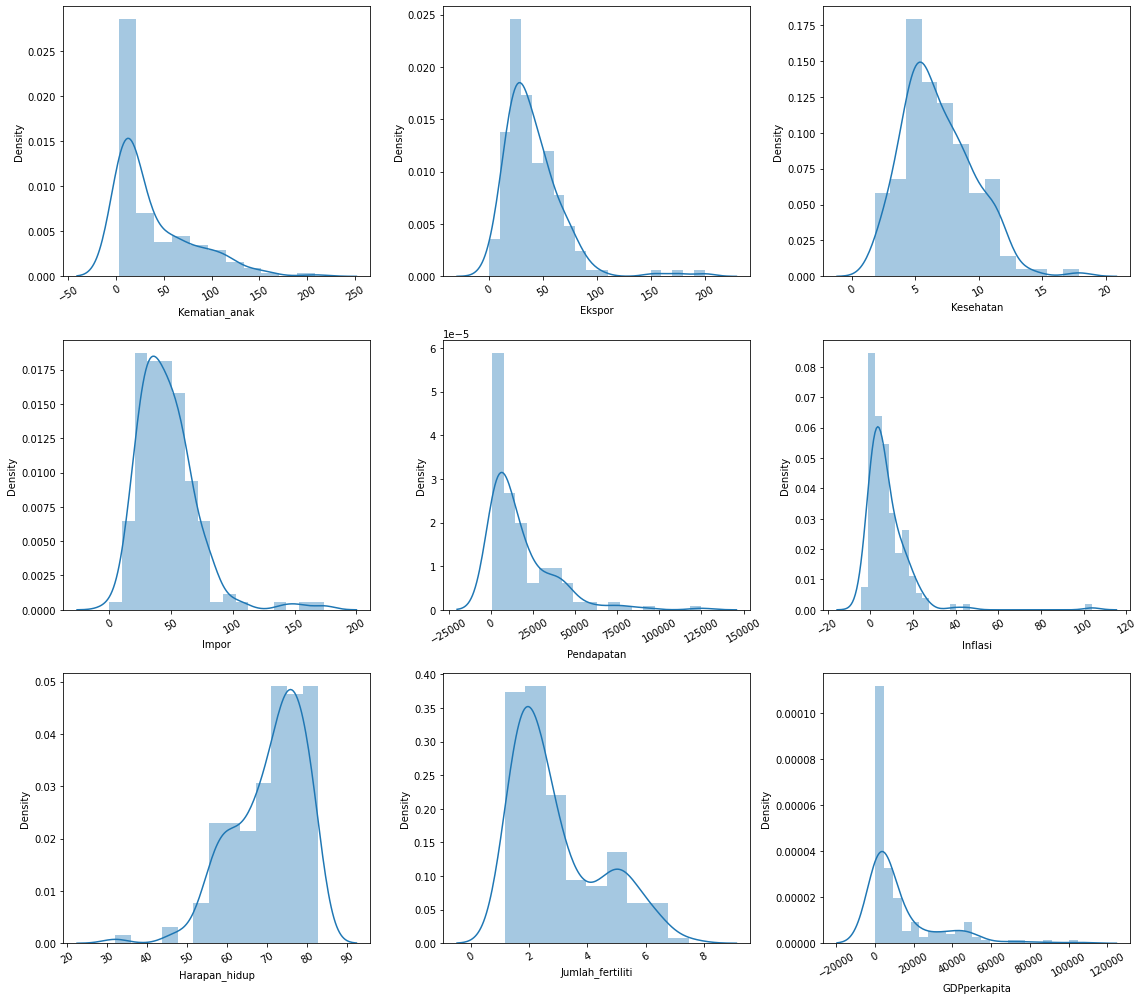

In [ ]:
# Visualize numerical columns with distribution plots
plt.figure(figsize=(16,14))

for i in enumerate(df.describe().columns):
  plt.subplot(3, 3, i[0]+1)
  sns.distplot(df[i[1]])
  plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

From distribution plots above, we can get several insights. <br />
* We can see that there are outliers in the data distribution of each feature.
* We can also see that each distribution plot that represents a feature tends to have a skewness of either right or left skew. The fact that they have a skewness shows that there is a quite large gap between Well-developed countries and Under-developed countries.

---
---

#### 2.4 Bivariate Analysis

(---- ***Plots Color Description*** ----) <br/>
<font color='tomato'>Tomato-red</font> : Help priority in certain criteria <br/>
<font color='mediumslateblue'>Mediumslate-blue</font> : Not a priority in certain criteria

In [ ]:
# Define bar plot function for visualizing top 15 country and bottom 15 country of each columns
def bar_plotting(n, data, ycol, xcol, newtitle, x_label,new_color):
    plt.subplot(1, 2, n)
    sns.barplot(y=ycol, x=xcol, data=data, color=new_color)
    plt.title(newtitle)
    plt.xlabel(x_label)
    plt.ylabel(None)
    sns.despine(left=True)
    return

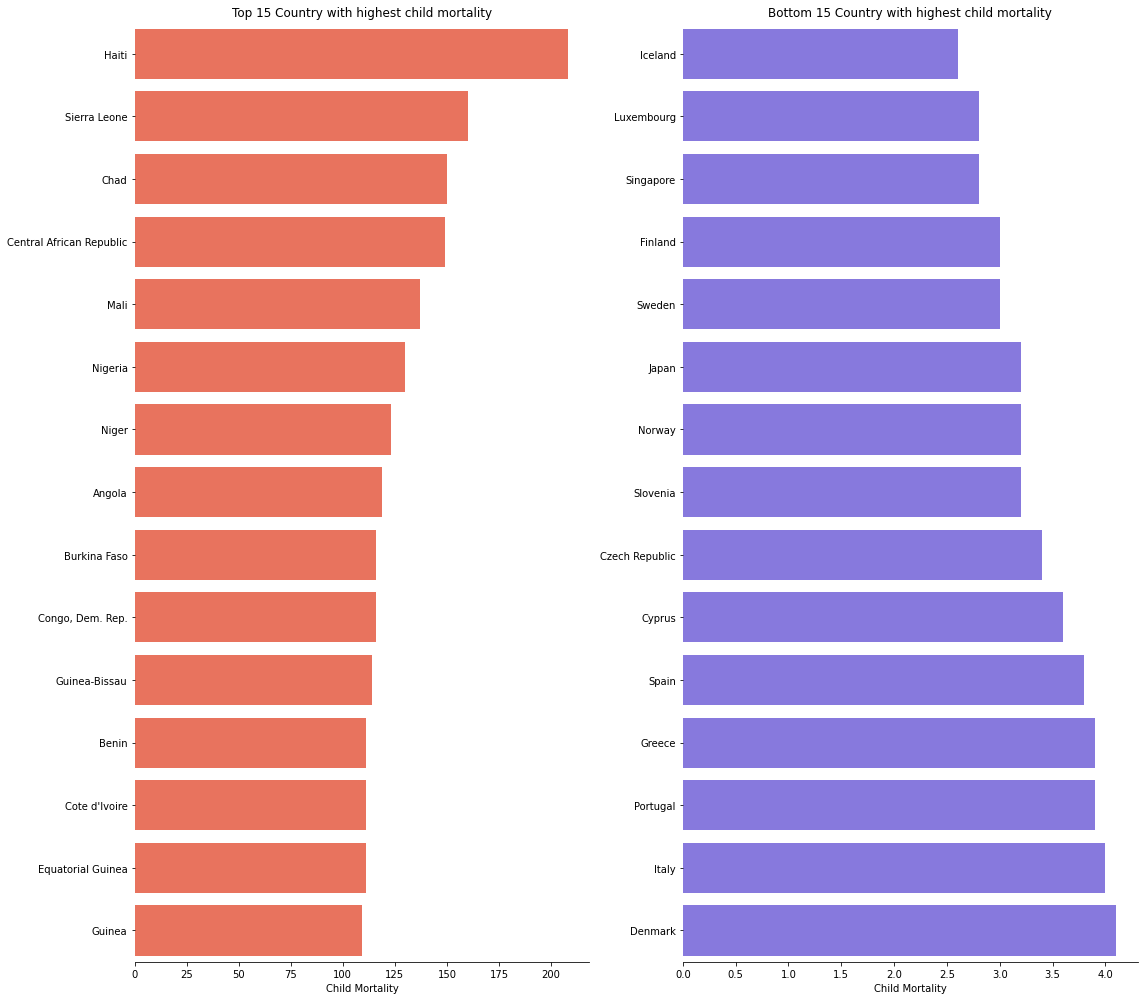

In [ ]:
# Visualize top 15 country and bottom 15 country with highest child mortality
plt.figure(figsize=(16,14))
cmt_df = df.nlargest(15, columns=['Kematian_anak'])
cml_df = df.nsmallest(15, columns=['Kematian_anak'])
bar_plotting(1, cmt_df, 'Negara', 'Kematian_anak', 'Top 15 Country with highest child mortality', 'Child Mortality', 'tomato')
bar_plotting(2, cml_df, 'Negara', 'Kematian_anak', 'Bottom 15 Country with highest child mortality', 'Child Mortality', 'mediumslateblue')
plt.tight_layout()
plt.show()

From bar plots above, we can get several insights. <br />
* We can see that Haiti has the highest child mortality rate.
* We can also see that Iceland has the lowest child mortality rate.

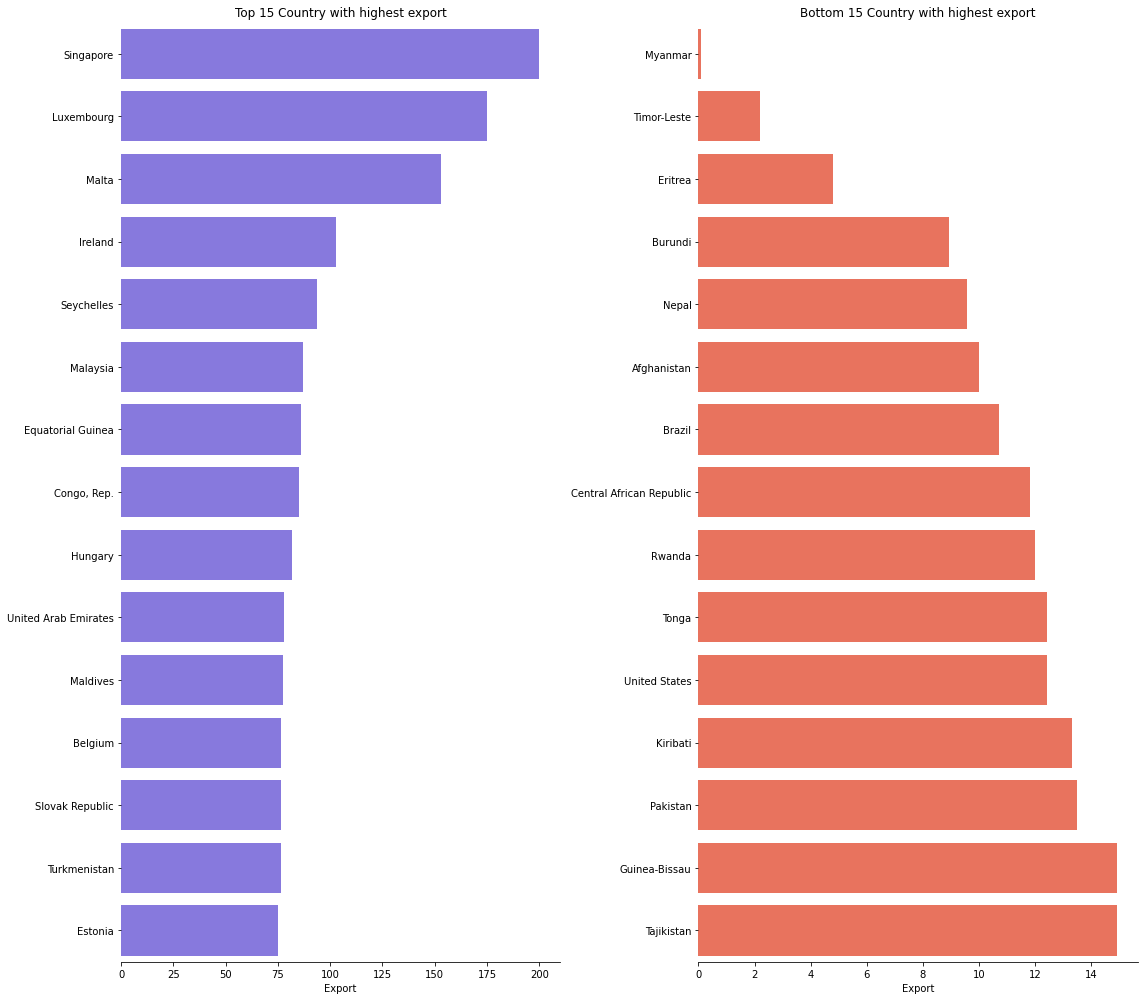

In [ ]:
# Visualize top 15 country and bottom 15 country with highest export
plt.figure(figsize=(16,14))
ext_df = df.nlargest(15, columns=['Ekspor'])
exl_df = df.nsmallest(15, columns=['Ekspor'])
bar_plotting(1, ext_df, 'Negara', 'Ekspor', 'Top 15 Country with highest export', 'Export', 'mediumslateblue')
bar_plotting(2, exl_df, 'Negara', 'Ekspor', 'Bottom 15 Country with highest export', 'Export', 'tomato')
plt.tight_layout()
plt.show()

From bar plots above, we can get several insights. <br />
* We can see that Singapore has the highest export rate.
* We can also see that Myanmar has the lowest export rate.

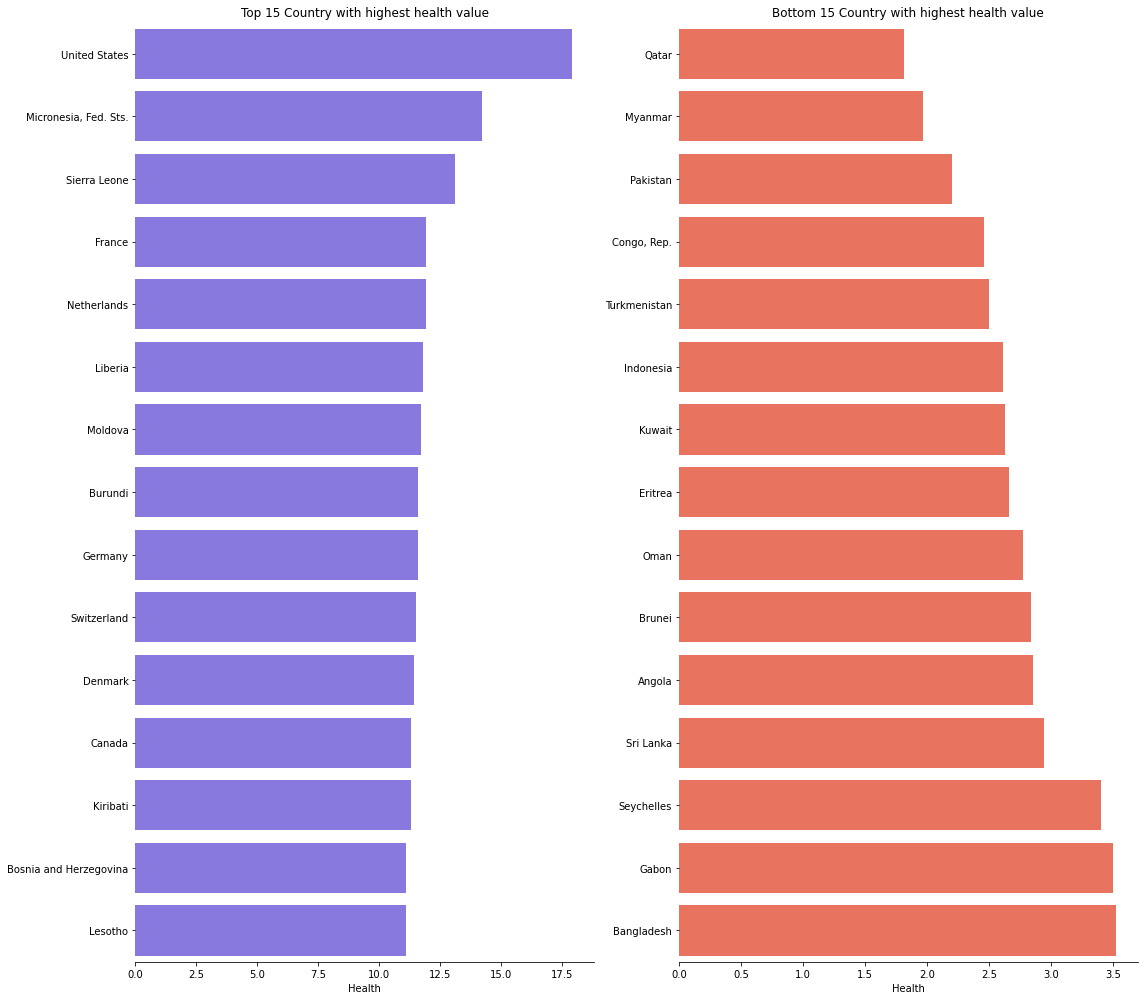

In [ ]:
# Visualize top 15 country and bottom 15 country with highest health value
plt.figure(figsize=(16,14))
htt_df = df.nlargest(15, columns=['Kesehatan'])
htl_df = df.nsmallest(15, columns=['Kesehatan'])
bar_plotting(1, htt_df, 'Negara', 'Kesehatan', 'Top 15 Country with highest health value', 'Health', 'mediumslateblue')
bar_plotting(2, htl_df, 'Negara', 'Kesehatan', 'Bottom 15 Country with highest health value', 'Health', 'tomato')
plt.tight_layout()
plt.show()

From bar plots above, we can get several insights. <br />
* We can see that United States has the highest health rate.
* We can also see that Qatar has the lowest health rate.

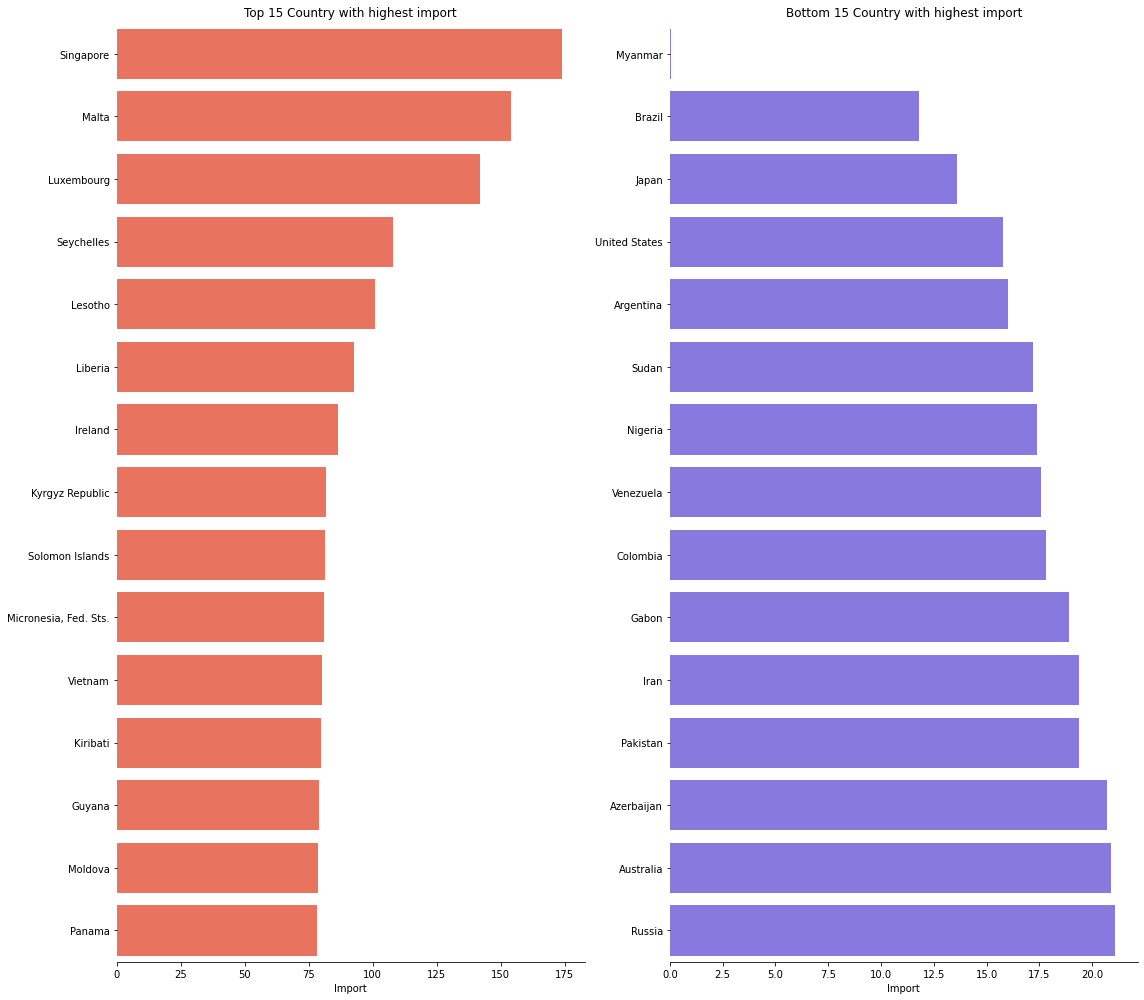

In [ ]:
# Visualize top 15 country and bottom 15 country with highest import
plt.figure(figsize=(16,14))
imt_df = df.nlargest(15, columns=['Impor'])
iml_df = df.nsmallest(15, columns=['Impor'])
bar_plotting(1, imt_df, 'Negara', 'Impor', 'Top 15 Country with highest import', 'Import', 'tomato')
bar_plotting(2, iml_df, 'Negara', 'Impor', 'Bottom 15 Country with highest import', 'Import', 'mediumslateblue')
plt.tight_layout()
plt.show()

From bar plots above, we can get several insights. <br />
* We can see that Singapore has the highest import rate.
* We can also see that Myanmar has the lowest import rate.

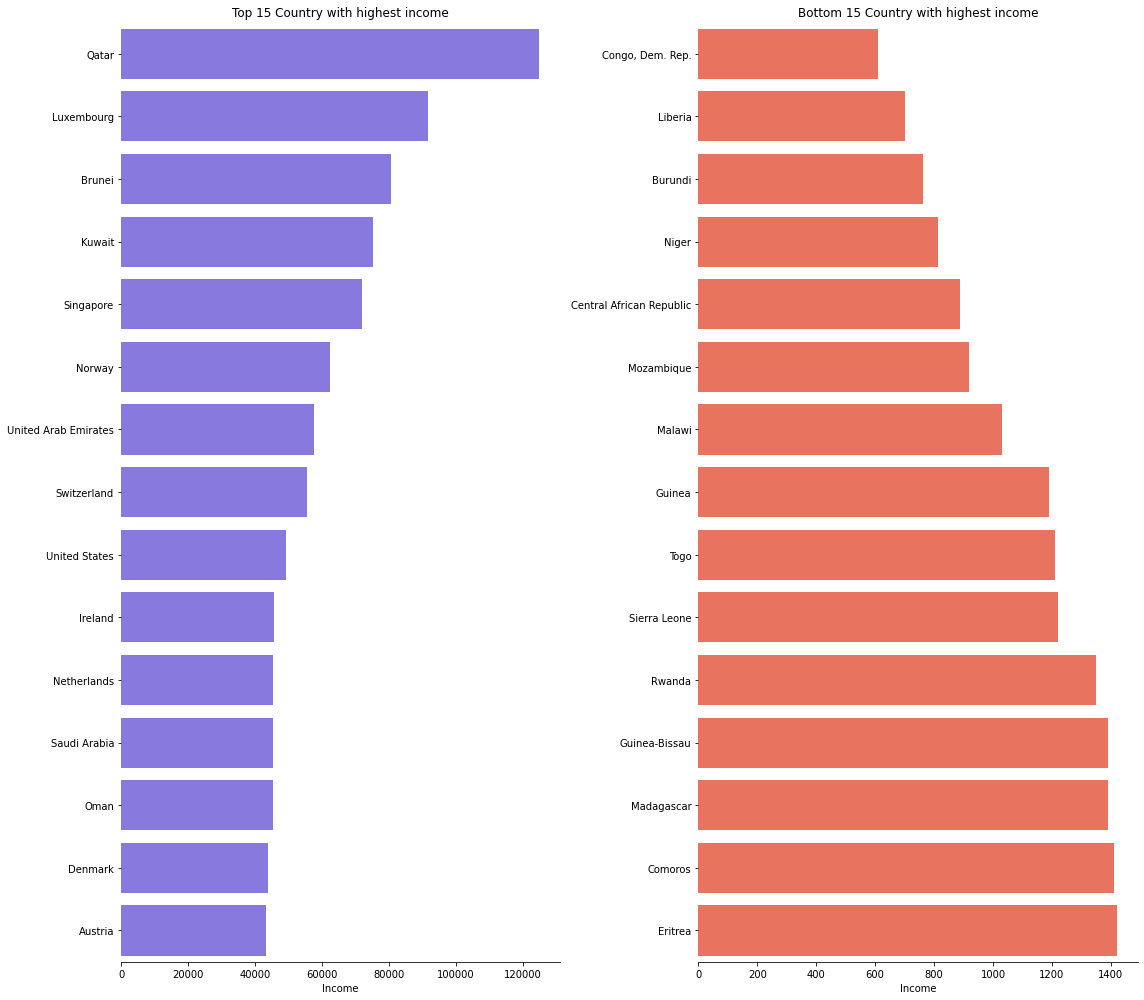

In [ ]:
# Visualize top 15 country and bottom 15 country with highest income
plt.figure(figsize=(16,14))
int_df = df.nlargest(15, columns=['Pendapatan'])
inl_df = df.nsmallest(15, columns=['Pendapatan'])
bar_plotting(1, int_df, 'Negara', 'Pendapatan', 'Top 15 Country with highest income', 'Income', 'mediumslateblue')
bar_plotting(2, inl_df, 'Negara', 'Pendapatan', 'Bottom 15 Country with highest income', 'Income', 'tomato')
plt.tight_layout()
plt.show()

From bar plots above, we can get several insights. <br />
* We can see that Qatar has the highest income.
* We can also see that Congo, Dem. Rep. has the lowest income.

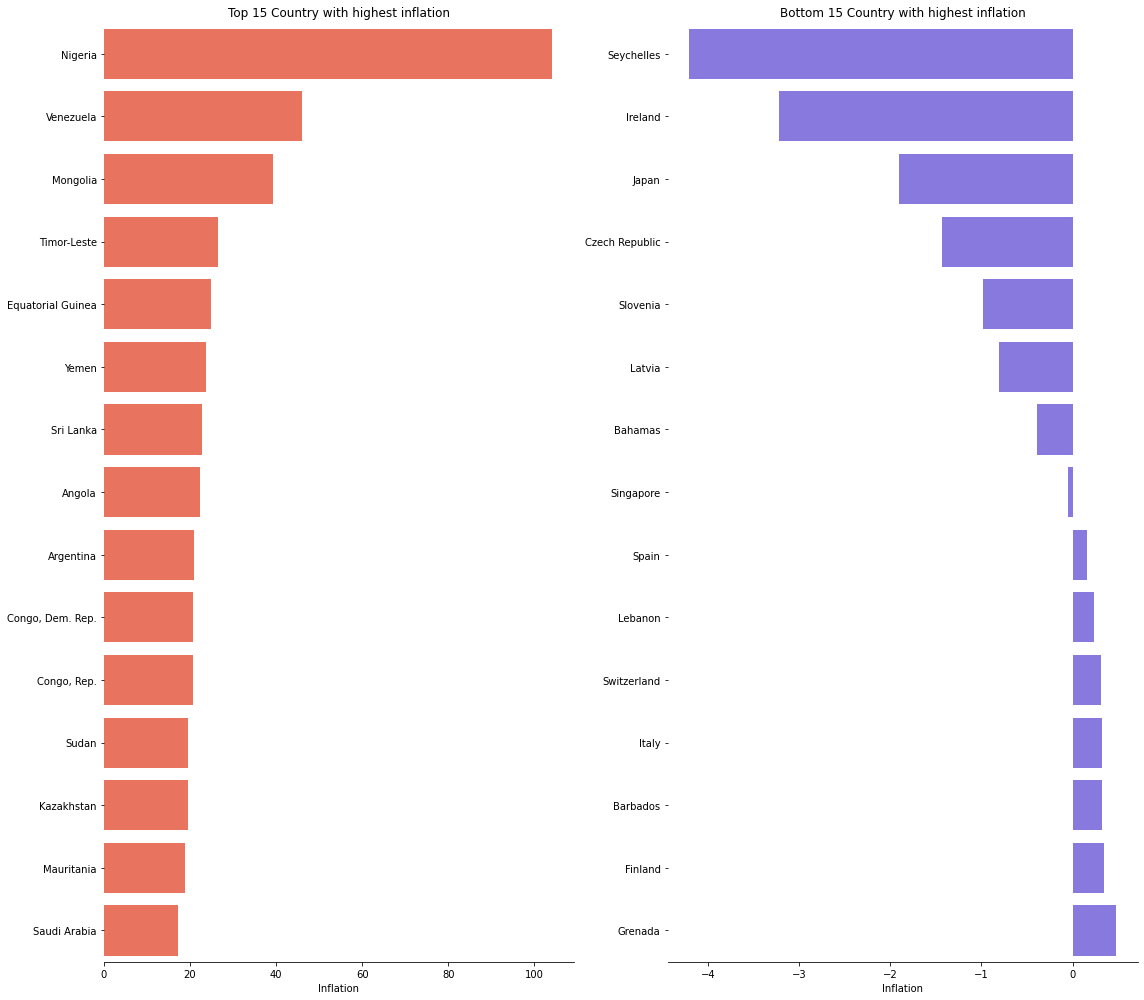

In [ ]:
# Visualize top 15 country and bottom 15 country with highest inflation
plt.figure(figsize=(16,14))
ift_df = df.nlargest(15, columns=['Inflasi'])
ifl_df = df.nsmallest(15, columns=['Inflasi'])
bar_plotting(1, ift_df, 'Negara', 'Inflasi', 'Top 15 Country with highest inflation', 'Inflation', 'tomato')
bar_plotting(2, ifl_df, 'Negara', 'Inflasi', 'Bottom 15 Country with highest inflation', 'Inflation', 'mediumslateblue')
plt.tight_layout()
plt.show()

From bar plots above, we can get several insights. <br />
* We can see that Nigeria has the highest inflation rate.
* We can also see that Seychelles. has the lowest inflation rate.

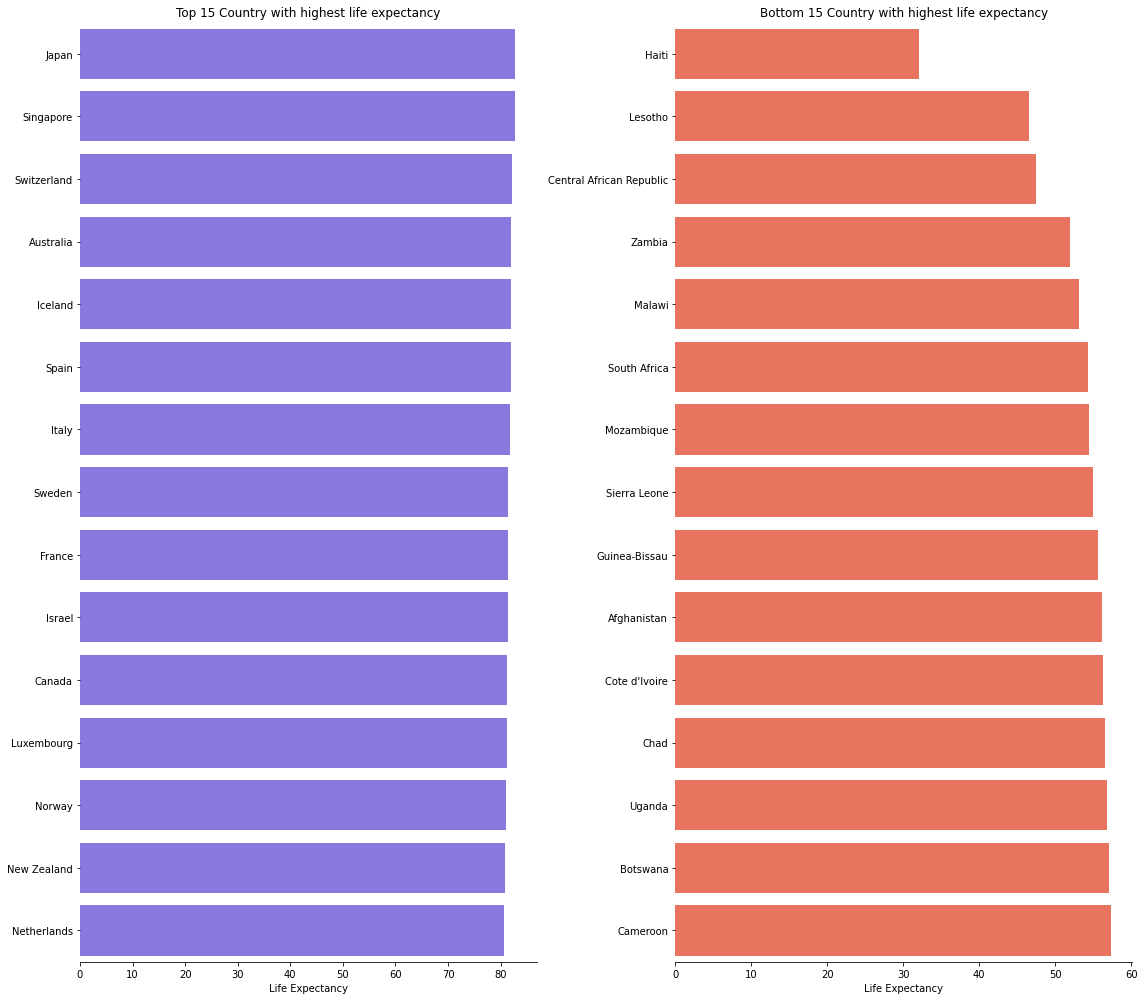

In [ ]:
# Visualize top 15 country and bottom 15 country with highest life expectancy
plt.figure(figsize=(16,14))
let_df = df.nlargest(15, columns=['Harapan_hidup'])
lel_df = df.nsmallest(15, columns=['Harapan_hidup'])
bar_plotting(1, let_df, 'Negara', 'Harapan_hidup', 'Top 15 Country with highest life expectancy', 'Life Expectancy', 'mediumslateblue')
bar_plotting(2, lel_df, 'Negara', 'Harapan_hidup', 'Bottom 15 Country with highest life expectancy', 'Life Expectancy', 'tomato')
plt.tight_layout()
plt.show()

From bar plots above, we can get several insights. <br />
* We can see that Japan has the highest life expectancy.
* We can also see that Haiti has the lowest life expectancy.

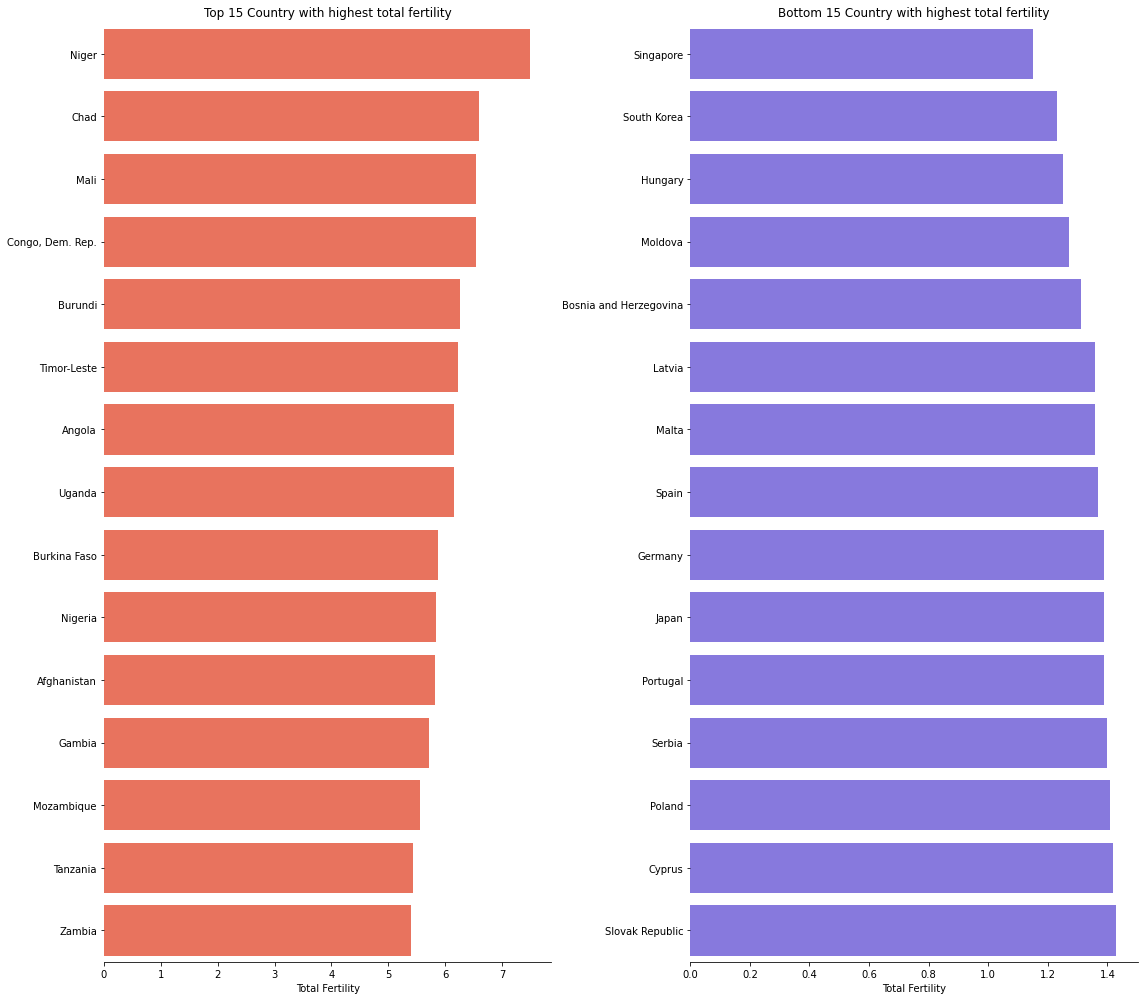

In [ ]:
# Visualize top 15 country and bottom 15 country with highest total fertility
plt.figure(figsize=(16,14))
fet_df = df.nlargest(15, columns=['Jumlah_fertiliti'])
fel_df = df.nsmallest(15, columns=['Jumlah_fertiliti'])
bar_plotting(1, fet_df, 'Negara', 'Jumlah_fertiliti', 'Top 15 Country with highest total fertility', 'Total Fertility', 'tomato')
bar_plotting(2, fel_df, 'Negara', 'Jumlah_fertiliti', 'Bottom 15 Country with highest total fertility', 'Total Fertility', 'mediumslateblue')
plt.tight_layout()
plt.show()

From bar plots above, we can get several insights. <br />
* We can see that Niger has the highest total fertility.
* We can also see that Singapore has the lowest total fertility.

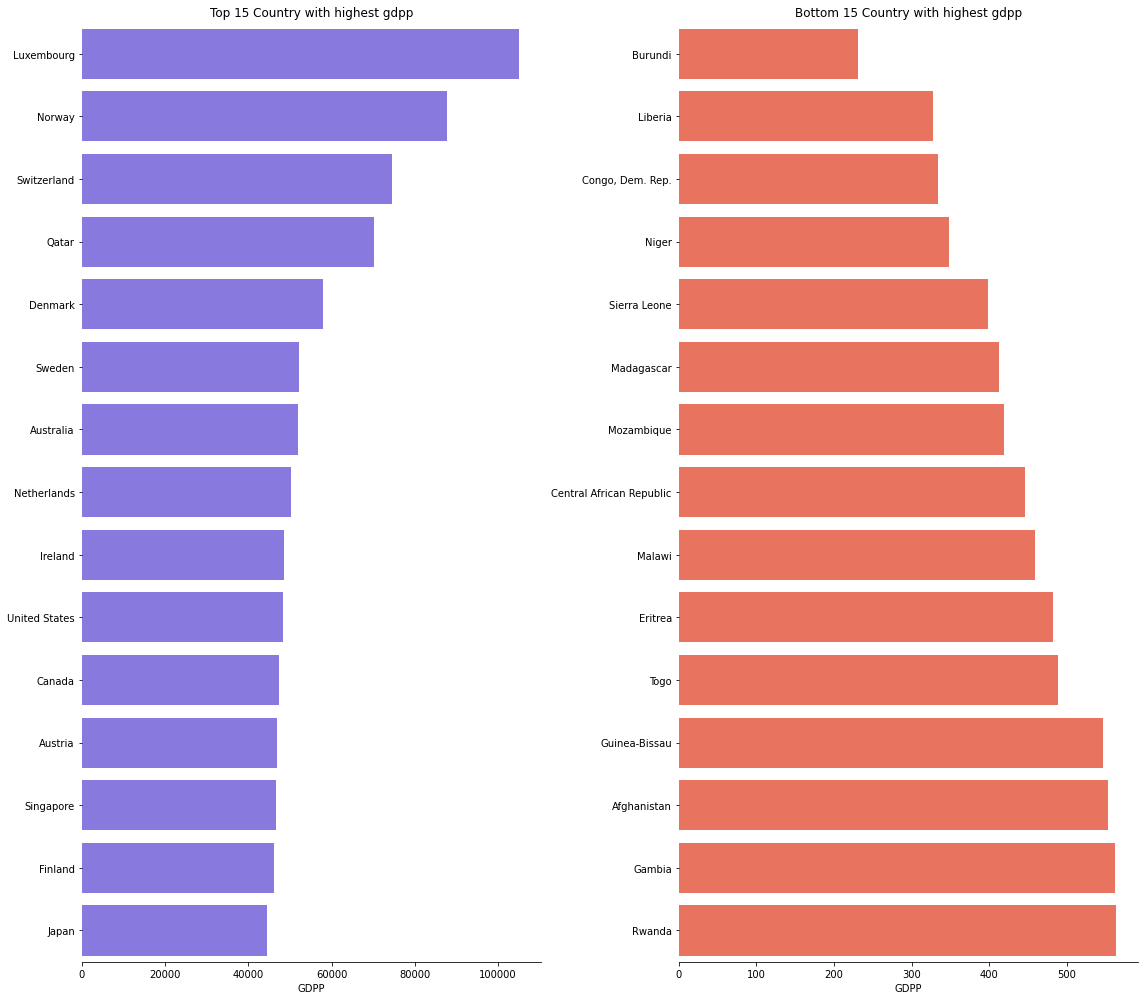

In [ ]:
# Visualize top 15 country and bottom 15 country with highest gdpp
plt.figure(figsize=(16,14))
gdt_df = df.nlargest(15, columns=['GDPperkapita'])
gdl_df = df.nsmallest(15, columns=['GDPperkapita'])
bar_plotting(1, gdt_df, 'Negara', 'GDPperkapita', 'Top 15 Country with highest gdpp', 'GDPP', 'mediumslateblue')
bar_plotting(2, gdl_df, 'Negara', 'GDPperkapita', 'Bottom 15 Country with highest gdpp', 'GDPP', 'tomato')
plt.tight_layout()
plt.show()

From bar plots above, we can get several insights. <br />
* We can see that Luxembourg has the highest GDPP.
* We can also see that Burundi has the lowest GDPP.

---
---

#### 2.5 Multivariate Analysis

<Figure size 1152x1008 with 0 Axes>

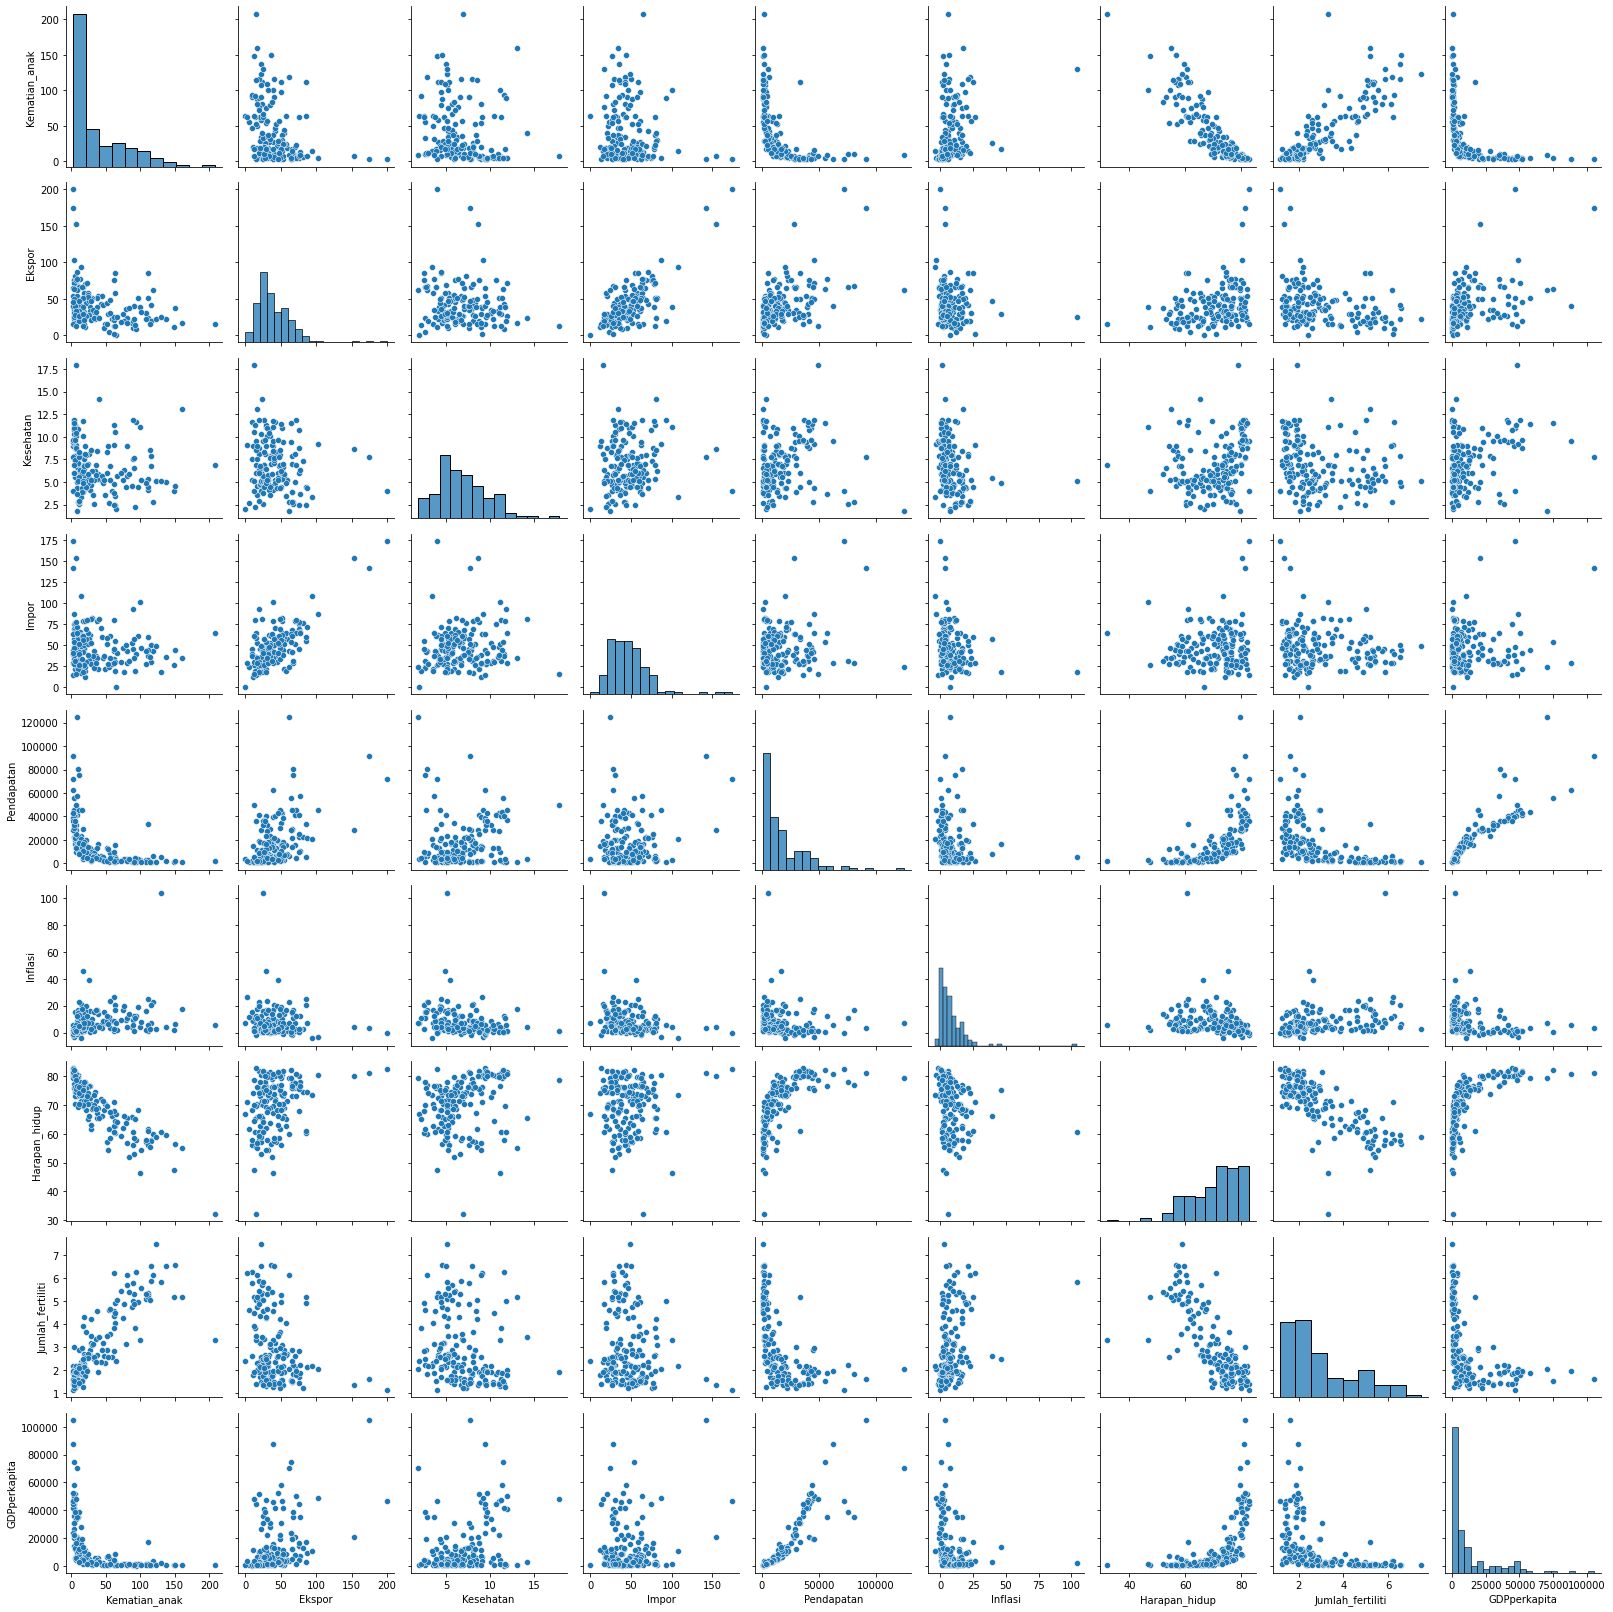

In [ ]:
# Visualize data with pairplot to show connections between variables
plt.figure(figsize=(16,14))
sns.pairplot(df)
plt.tight_layout()
plt.show()

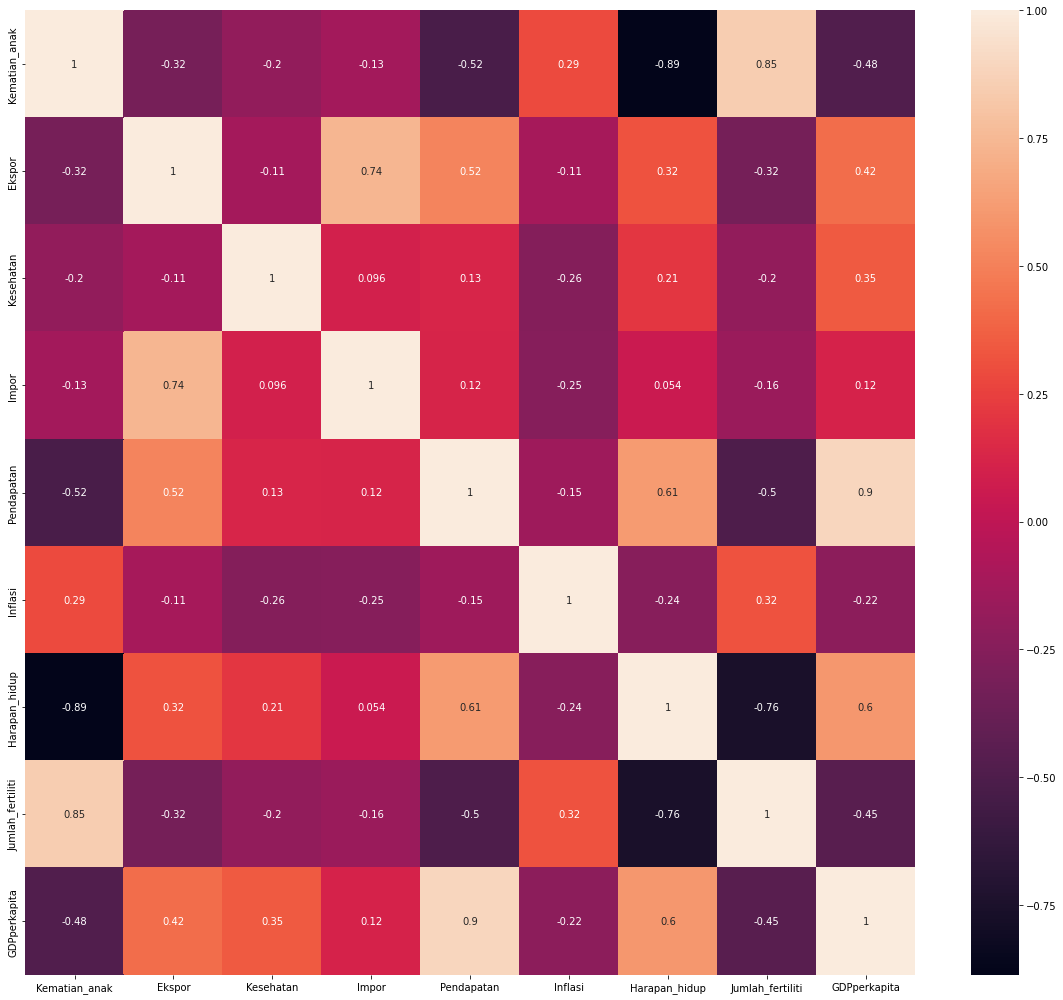

In [ ]:
# Visualize data with heatmap to show correlation between variables
plt.figure(figsize=(16,14))
sns.heatmap(df.corr(), annot=True, fmt='.2g')
plt.tight_layout()
plt.show()

(---- **Note that
if a and b are positively correlated, it means that if a increases, then b will also increase. On the contrary, if a and b are negatively correlated, it means that if a increases, then b will decrease.** ----) <br/><br/>
From pairplot and heatmap above, we can get several insights. <br />
* 'GDPperkapita' and 'Pendapatan' have a high positive correlation (0.9). It means countries that have a high 'Pendapatan' will also have a high 'GDPperkapita'.
* 'Kematian_anak' and 'Jumlah_fertiliti' also have a high positive correlation (0.85).
* 'Impor' and 'Ekspor' also have a high positive correlation (0.74).
* 'Pendapatan' and 'Harapan_hidup' also have a high positive correlation (0.61).
* 'GDPperkapita' and 'Harapan_hidup' also have a high positive correlation (0.6).
* 'Harapan_hidup' and 'Jumlah_fertiliti' have a high negative correlation (-0.76). It means countries that have a high 'Harapan_hidup' will have a low 'Jumlah_fertiliti'.
* 'Harapan_hidup' and 'Kematian_anak' also have a high negative correlation (-0.89).

---
---

# **3. Outliers Treatment** <br/> 

(---- ***The Following Statements Are Taken From Kaggle*** ----) <br/>
There are different ranges in capping the outliers:
* Soft range: 1th and 99th percentile.
* Mid range: 5th and 95th percentile.
* 25th and 75th percentile.

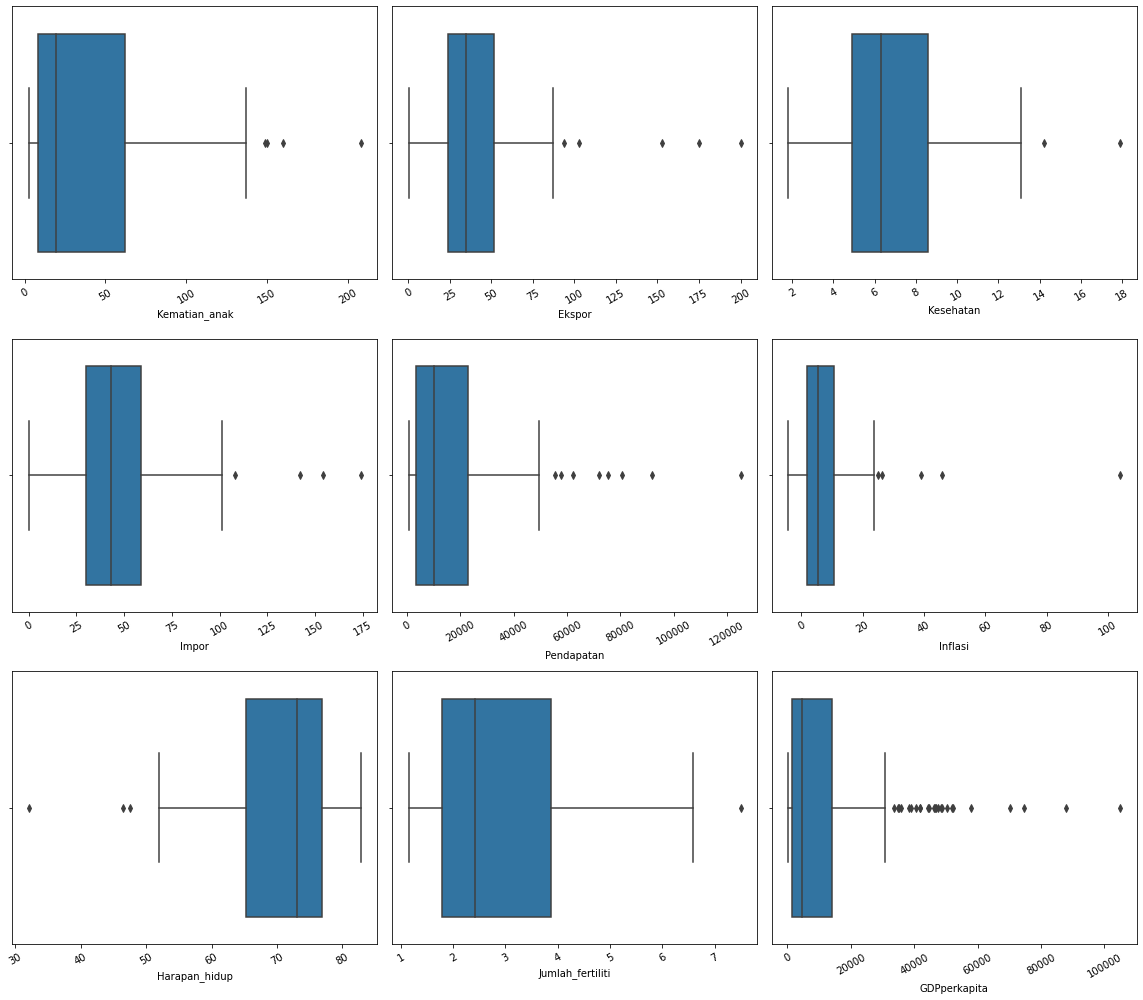

In [ ]:
# Visualize numerical columns with boxplots to see outliers
plt.figure(figsize=(16,14))

for i in enumerate(df.describe().columns):
  plt.subplot(3, 3, i[0]+1)
  sns.boxplot(df[i[1]])
  plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

From boxplots above, we know that each columns of the dataframe have outliers. Although outliers can affect the results of the clustering, they cannot be removed. The removal of outliers will have an impact on the ranking of countries that need financial aid from HELP International. Hence, we will use another approach by capping the outliers because our objective is to find list of countries that need financial aid from HELP International. Therefore, we can cap a small part of the outliers. To minimalize bias, the capping will be based on 99th percentile. </br>
</br>
The outliers are capped in these features (Most outliers features) : 'Ekspor', 'Impor' , 'Pendapatan', 'Kesehatan', 'Inflasi' and 'GDPperkapita' </br>
</br>
The outliers are not capped in these features : 'Kematian_anak', 'Harapan_hidup' , and 'Jumlah_fertiliti'.</br>

In [ ]:
# Cap the outliers
cap_features = ['Ekspor', 'Kesehatan' ,'Impor' ,'Pendapatan' ,'Inflasi' , 'GDPperkapita']
new_df = df.copy()
for col in cap_features:
    q4 = new_df[col].quantile(0.99)
    new_df.loc[new_df[col] >= q4, col] = q4

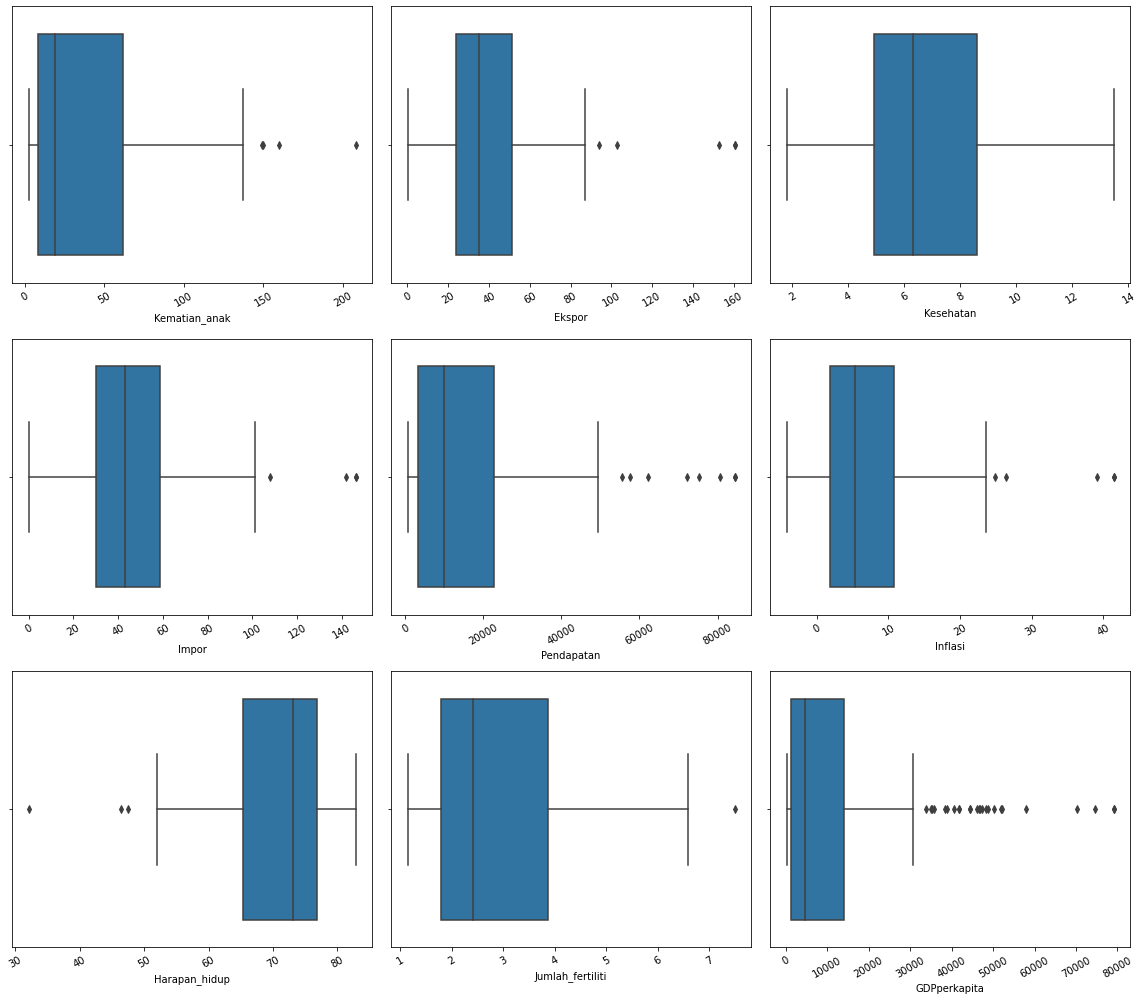

In [ ]:
# Visualize numerical columns with boxplots after capping the outliers
plt.figure(figsize=(16,14))

for i in enumerate(new_df.describe().columns):
  plt.subplot(3, 3, i[0]+1)
  sns.boxplot(new_df[i[1]])
  plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

---
---

# **4. Scaling Data** <br/> 

To make the clustering more accurate, we standardize the data by rescaling it using the standard scaler provided by scikit-learn.

In [ ]:
# Drop non-numeric column so we can rescale the data
num_df = new_df.drop(columns='Negara')
display(num_df)

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,90.2,10.0,7.58,44.9,1610.0,9.440,56.2,5.82,553.0
1,16.6,28.0,6.55,48.6,9930.0,4.490,76.3,1.65,4090.0
2,27.3,38.4,4.17,31.4,12900.0,16.100,76.5,2.89,4460.0
3,119.0,62.3,2.85,42.9,5900.0,22.400,60.1,6.16,3530.0
4,10.3,45.5,6.03,58.9,19100.0,1.440,76.8,2.13,12200.0
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950.0,2.620,63.0,3.50,2970.0
163,17.1,28.5,4.91,17.6,16500.0,41.478,75.4,2.47,13500.0
164,23.3,72.0,6.84,80.2,4490.0,12.100,73.1,1.95,1310.0
165,56.3,30.0,5.18,34.4,4480.0,23.600,67.5,4.67,1310.0


In [ ]:
# Rescale the data using Standard Scaler
sc = StandardScaler()
scaled_df = sc.fit_transform(num_df)
scaled_df

array([[ 1.29153238, -1.19927911,  0.30123858, ..., -1.61909203,
         1.90288227, -0.70225949],
       [-0.5389489 , -0.49806893, -0.08896601, ...,  0.64786643,
        -0.85997281, -0.49872564],
       [-0.27283273, -0.09292528, -0.99060381, ...,  0.67042323,
        -0.0384044 , -0.47743428],
       ...,
       [-0.37231541,  1.21600038,  0.02089742, ...,  0.28695762,
        -0.66120626, -0.65869853],
       [ 0.44841668, -0.42015669, -0.60797601, ..., -0.34463279,
         1.14094382, -0.65869853],
       [ 1.11495062, -0.14746385, -0.33900002, ..., -2.09278484,
         1.6246091 , -0.6500669 ]])

In [ ]:
# Check the top 5 rows of scaled dataframe
scaled_df = pd.DataFrame(scaled_df, columns = num_df.columns)
display(scaled_df.head())

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,1.291532,-1.199279,0.301239,-0.076771,-0.851668,0.265002,-1.619092,1.902882,-0.702259
1,-0.538949,-0.498069,-0.088966,0.083204,-0.386946,-0.372075,0.647866,-0.859973,-0.498726
2,-0.272833,-0.092925,-0.990604,-0.660465,-0.221053,1.122161,0.670423,-0.038404,-0.477434
3,2.007808,0.838126,-1.490672,-0.163244,-0.612045,1.932987,-1.179234,2.128151,-0.530950
4,-0.695634,0.183663,-0.285963,0.528541,0.125254,-0.764618,0.704258,-0.541946,-0.032042


---
---

# **5. Creating KMeans Clustering and Visualizing Clusters Formed** <br/> 

**Create random clustering first and visualize it**

In [ ]:
# Clustering with n_cluster 2
kmeans1 = KMeans(n_clusters = 2, random_state = 42).fit(scaled_df)
labels1 = kmeans1.labels_

In [ ]:
# Check after 2-clustering
print('n-cluster = 2 (Not a good cluster)')
print()
_tempdf = new_df.copy()
_tempdf['kmeans_2cluster'] = labels1
print('Cluster and its countries quantity :')
display(_tempdf.kmeans_2cluster.value_counts(ascending=True))
print()
display(_tempdf.head())

n-cluster = 2 (Not a good cluster)

Cluster and its countries quantity :


1    72
0    95
Name: kmeans_2cluster, dtype: int64

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,kmeans_2cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,1
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,0


<Figure size 1152x1440 with 0 Axes>

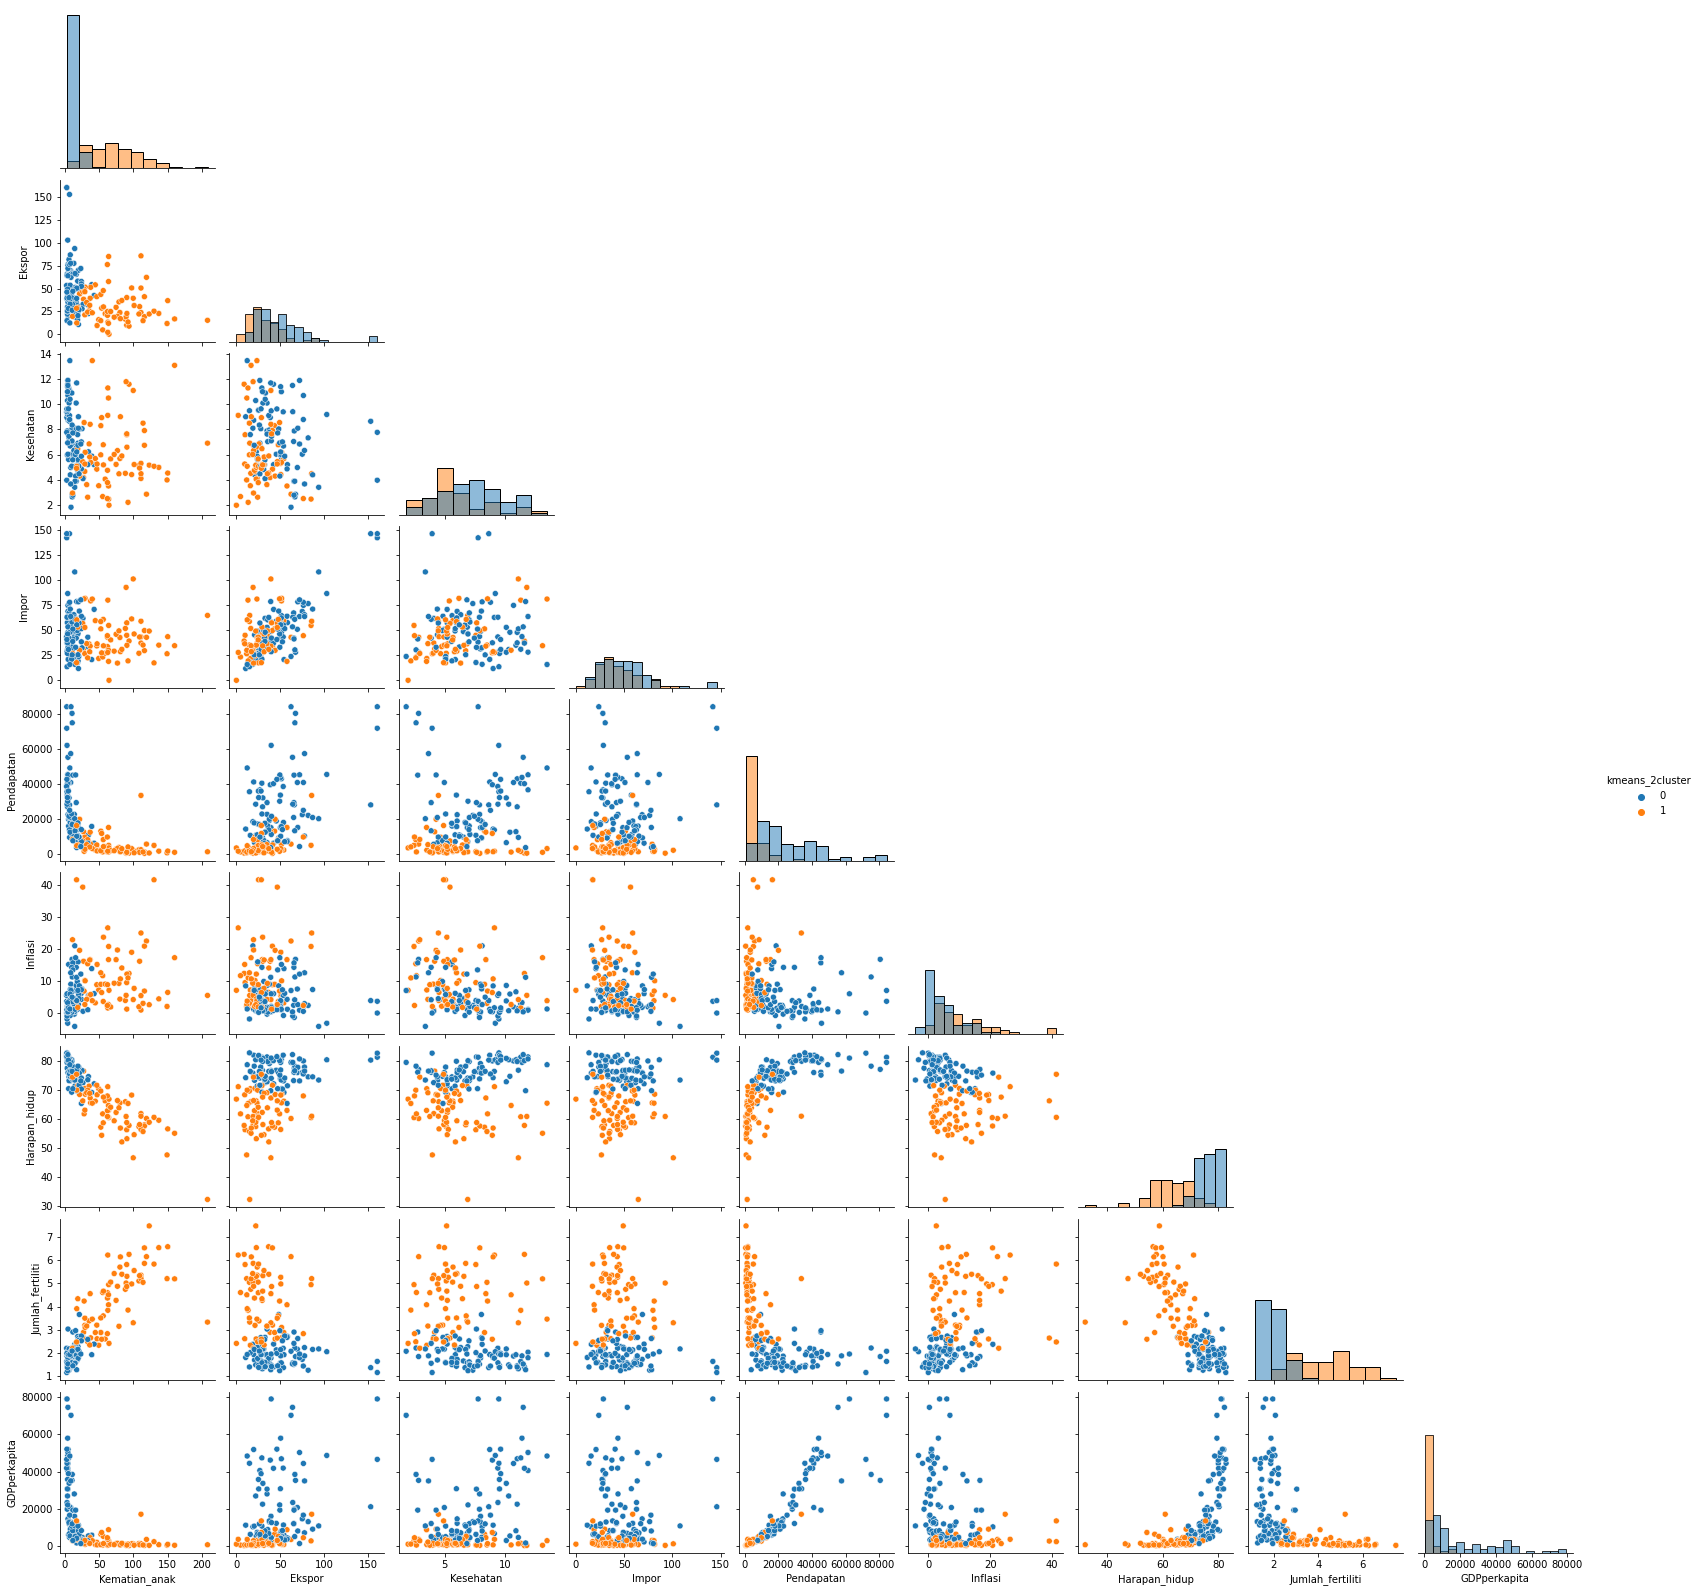

In [ ]:
# Visualize the 2-clusters
plt.figure(figsize=(16,20))
g = sns.pairplot(_tempdf, hue="kmeans_2cluster", diag_kind="hist", corner=True)
plt.show()

2-Clustering is not a good option and very few clusters. Therefore, we can use the elbow method or the silhouette score method to find other and more accurate cluster options.

**Create functions for Elbow method**

In [ ]:
# Elbow Method to find most accurate n-cluster
def elbowMethod(data, k_min=2, k_max= 10):
    wcss = [] # Within Cluster Sum of Squares
    k_range = range(k_min, k_max + 1)

    for i in k_range:
      kmeans_test = KMeans(n_clusters = i, random_state = 42, init = 'k-means++')
      kmeans_test.fit(data)
      wcss.append(kmeans_test.inertia_)

    fig, ax = plt.subplots(figsize=(15,8))
    ax.plot(k_range, wcss, marker='o')

    for i, value in enumerate(wcss):
        ax.text(i+2.15, value-0.005, round(value,3))

    plt.axvline(x = 4, color = 'r')
    plt.title('The Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

**Create functions for silhoutte method**

In [ ]:
# silhouette Method to find most accurate n-cluster
def silMethod(data, k_min=2, k_max=10):
    sil_score = []
    k_range = range(k_min, k_max+1)

    for k in k_range:
        model2 = KMeans(n_clusters = k)
        model2.fit(data)
        labels = model2.labels_
        s_score = silhouette_score(data, labels, metric='euclidean')
        sil_score.append(s_score)
        
    fig, ax = plt.subplots(figsize=(15,8))
    ax.plot(k_range, sil_score, marker='o')

    for i, value in enumerate(sil_score):
        ax.text(i+2.15, value-0.005, round(value,3))

    plt.xticks(k_range)
    plt.axvline(x = 4, color = 'r')
    plt.title('Silhouette Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.show()

Elbow Method



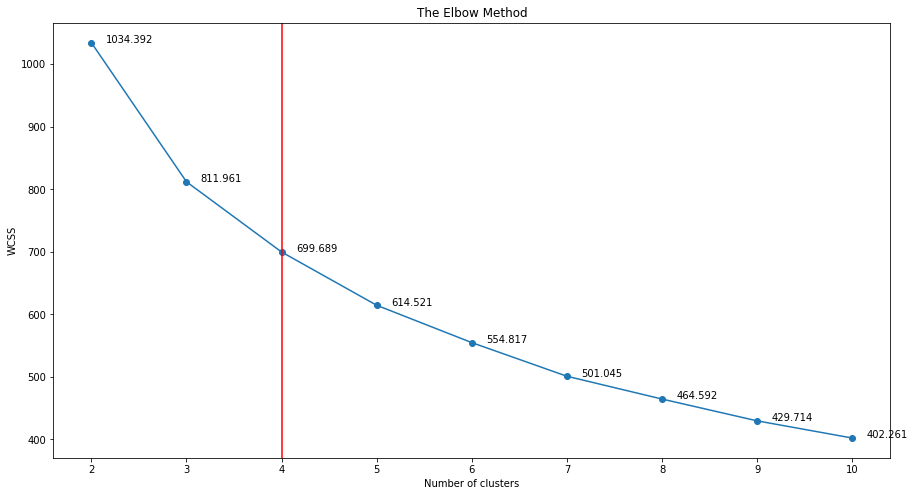

In [ ]:
print('Elbow Method')
print()
elbowMethod(scaled_df)

Silhouette Method



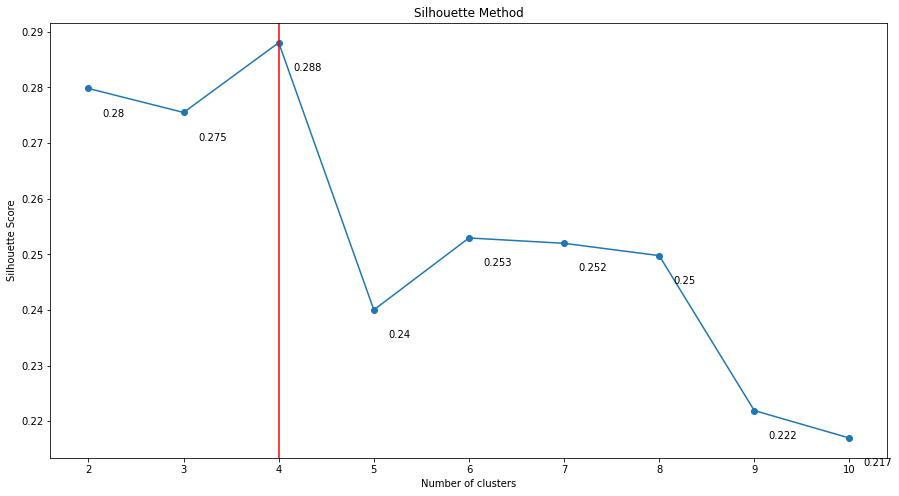

In [ ]:
print('Silhouette Method')
print()
silMethod(scaled_df)

We can see from elbow point and silhouette score, the best clusters we can get are 3-clusters or 4-clusters. We can pick 4-clusters because they tend to have higher silhouette score.

In [ ]:
# Clustering with n_cluster 4
kmeans2 = KMeans(n_clusters = 4, random_state = 42).fit(scaled_df)
labels2 = kmeans2.labels_

In [ ]:
# Check after 4-clustering
print('n-cluster = 4')
print()
new_df['Cluster'] = labels2
print('Cluster and its countries quantity :')
display(new_df.Cluster.value_counts(ascending=True))
print()
display(new_df.head())

n-cluster = 4

Cluster and its countries quantity :


3     5
1    31
2    46
0    85
Name: Cluster, dtype: int64

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,2
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,0


In [ ]:
# Display mean statistic of each columns after 4-clustering to represents centroids
analysis_res = new_df.groupby('Cluster').agg({'mean'})
analysis_res['Banyak_negara'] = new_df.groupby('Cluster')['Negara'].count()
display(analysis_res)

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,Banyak_negara
,mean,mean,mean,mean,mean,mean,mean,mean,mean,
Cluster,,,,,,,,,,
0,22.138824,40.483400,6.246165,47.247834,12587.882353,7.711788,72.680000,2.309059,6467.200000,85
1,5.212903,44.283871,8.942387,39.103226,42657.225806,2.698806,80.070968,1.780000,41625.419355,31
2,93.841304,28.837174,6.346957,42.128261,3738.978261,10.727891,59.232609,5.054348,1826.130435,46
3,6.200000,134.152000,6.594000,125.732000,50174.800000,-0.005200,79.620000,1.672000,41257.600000,5


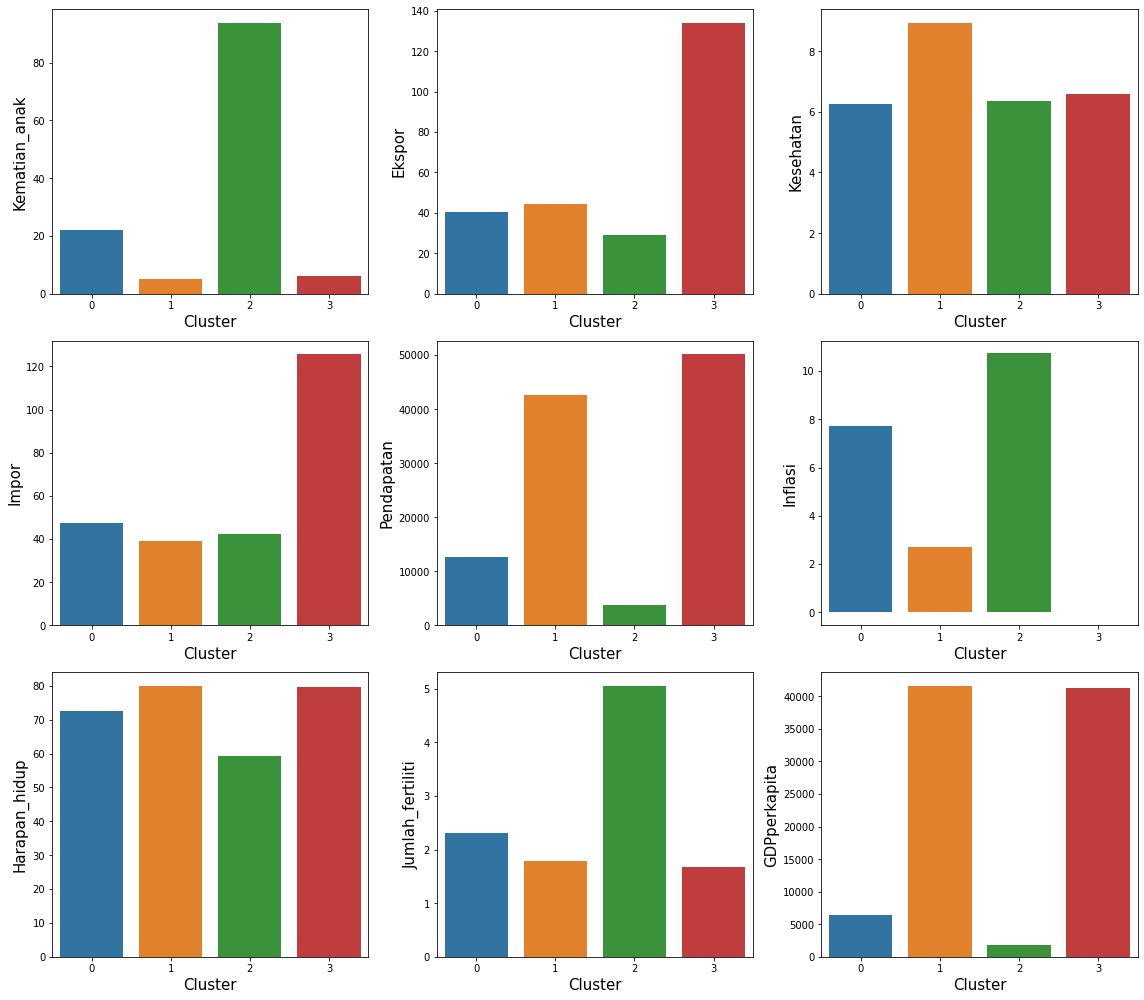

In [ ]:
# Visualize mean statistic of each columns after 4-clustering
plt.figure(figsize=(16, 14))
for i, var in enumerate(num_df.columns):
    plt.subplot(3,3,i+1)
    sns.barplot(x = analysis_res.reset_index().Cluster, y = analysis_res[var]['mean'])
    plt.ylabel(var, fontsize=15)
    plt.xlabel('Cluster', fontsize=15)
plt.tight_layout()    
plt.show()    

Based on the graphs above, we should consider cluster 2 countries for aid recommendation because all of the data features representing cluster 2 are the closest to the characteristics of underdeveloped countries that need financial aid. Here are the reasons why we should choose cluster 2 as an option.
* Highest 'Kematian_anak'
* Lowest 'Ekspor'
* Comparatively low 'Kesehatan'
* Comparatively Low 'Impor'
* Lowest 'Pendapatan'
* Highest 'Inflasi'
* Lowest 'Harapan_hidup'
* Highest 'Jumlah_fertiliti'
* Lowest 'GDPperkapita'


# **6. Report Countries** <br/> 

**Recommendation for HELP International**

Due to financial limitations owned by HELP International, it is best to choose the most underdeveloped countries. Therefore, we will pick at least 5 of the most underdeveloped countries based by the following criterias.
* Highest 'Kematian_anak'
* Lowest 'Ekspor'
* Lowest 'Kesehatan'
* Highest 'Impor'
* Lowest 'Pendapatan'
* Highest 'Inflasi'
* Lowest 'Harapan_hidup'
* Highest 'Jumlah_fertiliti'
* Lowest 'GDPperkapita'

In [ ]:
# Show top 5 countries as a recommendation result
results = new_df[new_df['Cluster']==2]
results.sort_values(['GDPperkapita','Pendapatan','Kematian_anak','Kesehatan','Inflasi','Harapan_hidup','Jumlah_fertiliti','Impor','Ekspor'], 
                    ascending=[True,True,False,True,False,True,False,False,True]).head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,Cluster
26,Burundi,93.6,8.92,11.60,39.2,764.0,12.30,57.7,6.26,231.0,2
88,Liberia,89.3,19.10,11.80,92.6,700.0,5.47,60.8,5.02,327.0,2
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609.0,20.80,57.5,6.54,334.0,2
112,Niger,123.0,22.20,5.16,49.1,814.0,2.55,58.8,7.49,348.0,2
132,Sierra Leone,160.0,16.80,13.10,34.5,1220.0,17.20,55.0,5.20,399.0,2
